# Lecture 4 & 5 plots and analysis

## CSP Basics

### $\eta_{th}$ as a function of C, $\epsilon$, and $T_{r}$

In [8]:
from egb351.constants import h,c,kB,σ
import numpy as np
import matplotlib.pyplot as plt
from egb351.math import tand, cosd, sind
ε,h = 0.94,0
T_amb,T_sky = 300,300-10
η_opt = 0.9
DNI = 1000
η_th = lambda C,Tr,ε: 1 - (σ*ε*(Tr**4-T_sky**4)+h*(Tr-T_amb))/(η_opt*C*DNI)
η_carnot = lambda Tr: (1-T_amb/Tr)
η_ideal = lambda C,Tr,ε: η_opt *η_carnot(Tr) * η_th(C,Tr,ε)



### $C$ and $T_r$

Text(0, 0.5, 'Concentration Ratio')

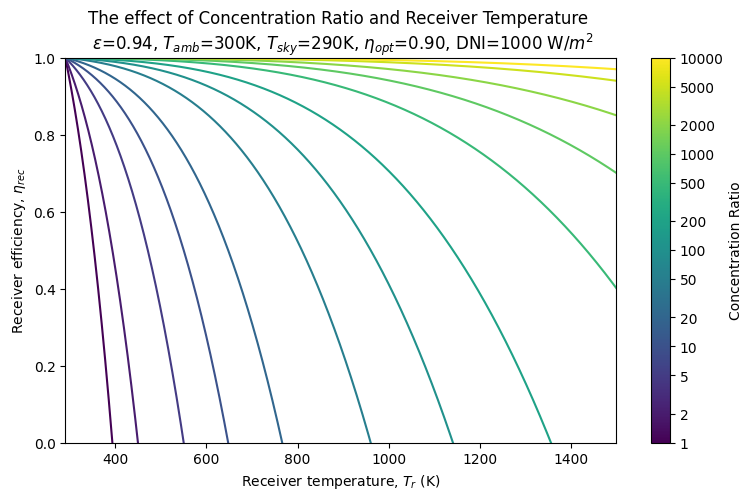

In [9]:
CRs = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]
Trs = np.linspace(T_sky,1500,5000)
norm = plt.Normalize(0,max(np.log10(CRs)))

height = 5.0
fig,ax = plt.subplots(figsize=(16/9*height,height))
for c in CRs:
    η = η_th(c,Trs,ε)
    color = plt.cm.viridis(norm(np.log10(c)))
    ax.plot(Trs[η>=0],η[η>=0],color=color)

ax.set_ylim((0,1))
ax.set_xlim((T_sky,Trs.max()))
ax.set_xlabel('Receiver temperature, $T_r$ (K)')
ax.set_ylabel(r'Receiver efficiency, $\eta_{rec}$')
ax.set_title(f'The effect of Concentration Ratio and Receiver Temperature \n $\\epsilon$={ε:.2f}, $T_{{amb}}$={T_amb:.0f}K, $T_{{sky}}$={T_sky:.0f}K, $\\eta_{{opt}}$={η_opt:.2f}, DNI={DNI:.0f} W/$m^2$',
             fontsize=12)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm,ax=ax)
c_ticks = cbar.ax.set_yticks(np.log10(CRs))
cbar.ax.set_yticklabels(CRs)
cbar.ax.set_ylabel("Concentration Ratio")

### Add emissivity effect

Text(0, 0.5, 'Concentration Ratio')

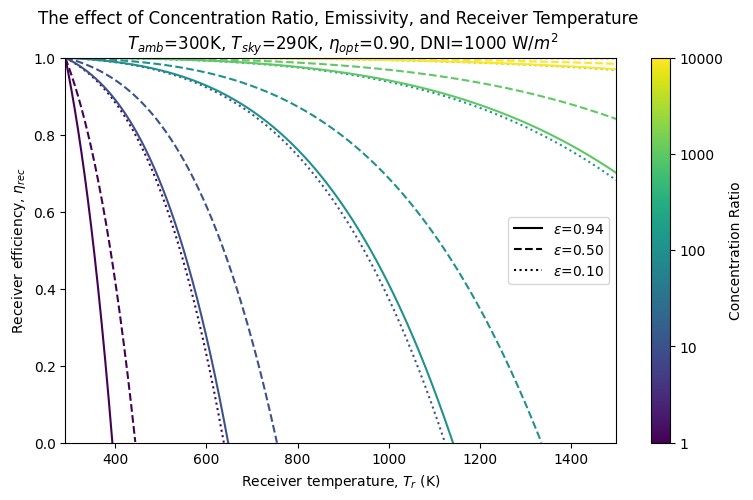

In [10]:
from matplotlib.lines import Line2D
CRs = [1,10,100,1000,10000]
Trs = np.linspace(T_sky,1500,5000)
εs = [0.94,0.5,0.1]
styles = ['-','--',':']
norm = plt.Normalize(0,max(np.log10(CRs)))

height = 5.0
fig,ax = plt.subplots(figsize=(16/9*height,height))
legend_elements = []
for ii,c in enumerate(CRs):
    for jj,e in enumerate(εs):
        η = η_th(c,Trs,e)
        color = plt.cm.viridis(norm(np.log10(c)))
        le = ax.plot(Trs[η>=0],η[η>=0],color=color,linestyle=styles[jj])
        if ii == 1:
            legend_elements.append(Line2D([0],[0],color='black',linestyle=styles[jj],label=f"$\\epsilon$={e:.2f}"))

ax.legend(handles=legend_elements)    

ax.set_ylim((0,1))
ax.set_xlim((T_sky,Trs.max()))
ax.set_xlabel('Receiver temperature, $T_r$ (K)')
ax.set_ylabel(r'Receiver efficiency, $\eta_{rec}$')
title = f'The effect of Concentration Ratio, Emissivity, and Receiver Temperature \n '
title += f'$T_{{amb}}$={T_amb:.0f}K, $T_{{sky}}$={T_sky:.0f}K, $\\eta_{{opt}}$={η_opt:.2f}, DNI={DNI:.0f} W/$m^2$'
ax.set_title(title,fontsize=12)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm,ax=ax)
c_ticks = cbar.ax.set_yticks(np.log10(CRs))
cbar.ax.set_yticklabels(CRs)
cbar.ax.set_ylabel("Concentration Ratio")


### Ideal efficiency

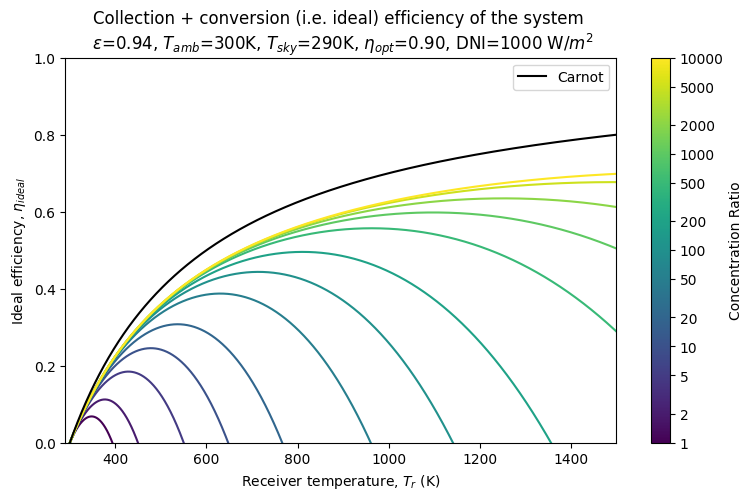

In [11]:
CRs = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]
Trs = np.linspace(T_sky,1500,5000)
norm = plt.Normalize(0,max(np.log10(CRs)))

height = 5.0
fig,ax = plt.subplots(figsize=(16/9*height,height))
for c in CRs:
    η = η_ideal(c,Trs,ε)
    color = plt.cm.viridis(norm(np.log10(c)))
    ax.plot(Trs[η>=0],η[η>=0],color=color)

ax.plot(Trs,η_carnot(Trs),label='Carnot',color='black')

ax.set_ylim((0,1))
ax.set_xlim((T_sky,Trs.max()))
ax.set_xlabel('Receiver temperature, $T_r$ (K)')
ax.set_ylabel(r'Ideal efficiency, $\eta_{ideal}$')
ax.set_title(f'Collection + conversion (i.e. ideal) efficiency of the system \n $\\epsilon$={ε:.2f}, $T_{{amb}}$={T_amb:.0f}K, $T_{{sky}}$={T_sky:.0f}K, $\\eta_{{opt}}$={η_opt:.2f}, DNI={DNI:.0f} W/$m^2$',
             fontsize=12)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm,ax=ax)
c_ticks = cbar.ax.set_yticks(np.log10(CRs))
cbar.ax.set_yticklabels(CRs)
cbar.ax.set_ylabel("Concentration Ratio")
ax.legend()

## Parabolic trough

### Geometry

Text(-1.1, -0.5170820732596526, 'Focal length to aperture, $f/W$')

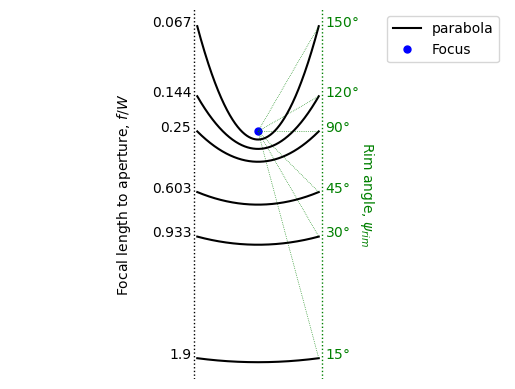

In [12]:
W = 1
ratio = [1.9,0.933,0.603,0.25,0.1442,0.067]
fig,ax = plt.subplots()

for ii,r in enumerate(ratio):
    f = r*W
    ψ_rim = np.arctan2(8*r,16*r**2-1)*180/np.pi
    ψ = np.linspace(-ψ_rim,ψ_rim,1000)
    pp = 2*f/(1+cosd(ψ))
    if ii == 1:
        ax.plot(pp*sind(ψ),-pp*cosd(ψ),color='black',label='parabola')
        ax.plot(0,0,'.',markersize=10,color='blue',label='Focus')
    else:
        ax.plot(pp*sind(ψ),-pp*cosd(ψ),color='black',label=None)
    
    ax.plot([0,pp[-1]*sind(ψ[-1])],[0,-pp[-1]*cosd(ψ[-1])],ls=':',linewidth=0.5,color='green')
    ax.annotate(f"{r:.3g}",(-1.1*W/2,-pp[0]*cosd(ψ[0])),ha='right')
    ax.annotate(rf"{ψ_rim:.0f}$\degree$",(1.1*W/2,-pp[-1]*cosd(ψ[-1])),ha='left',color='green')


ax.legend()
ax.axis('equal')
ax.set_xlim((-W/2,W/2))
ax.axvline(-1.05*W/2,ls=':',linewidth=1.0,color='black')
ax.axvline(1.05*W/2,ls=':',linewidth=1.0,color='green')
ax.axis('off')

y_mid = 0.5*sum(ax.get_ylim())
ax.annotate(r"Rim angle, $\psi_{rim}$",(1.8*W/2,y_mid),ha='center',va='center',rotation=-90,color='green')
ax.annotate(r"Focal length to aperture, $f/W$",(-2.2*W/2,y_mid),ha='center',va='center',rotation=90)
